In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install pandas matplotlib statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Asus/.vscode/P2- OfficeSupplies Data.csv')


In [3]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [4]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Inspect the first few rows
print(df.head())


OrderDate     0
Region        0
Rep           0
Item          0
Units         0
Unit Price    0
dtype: int64
OrderDate      object
Region         object
Rep            object
Item           object
Units           int64
Unit Price    float64
dtype: object
   OrderDate   Region      Rep     Item  Units  Unit Price
0  04-Jul-14     East  Richard  Pen Set     62        4.99
1  12-Jul-14     East     Nick   Binder     29        1.99
2  21-Jul-14  Central   Morgan  Pen Set     55       12.49
3  29-Jul-14     East    Susan   Binder     81       19.99
4  07-Aug-14  Central  Matthew  Pen Set     42       23.95


Total Sales by Category:
 Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Sales, dtype: float64

Highest Sales Category: Binder with sales of 9577.65

Top 10 Best-Selling Products:
 Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Sales, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\1258383291.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


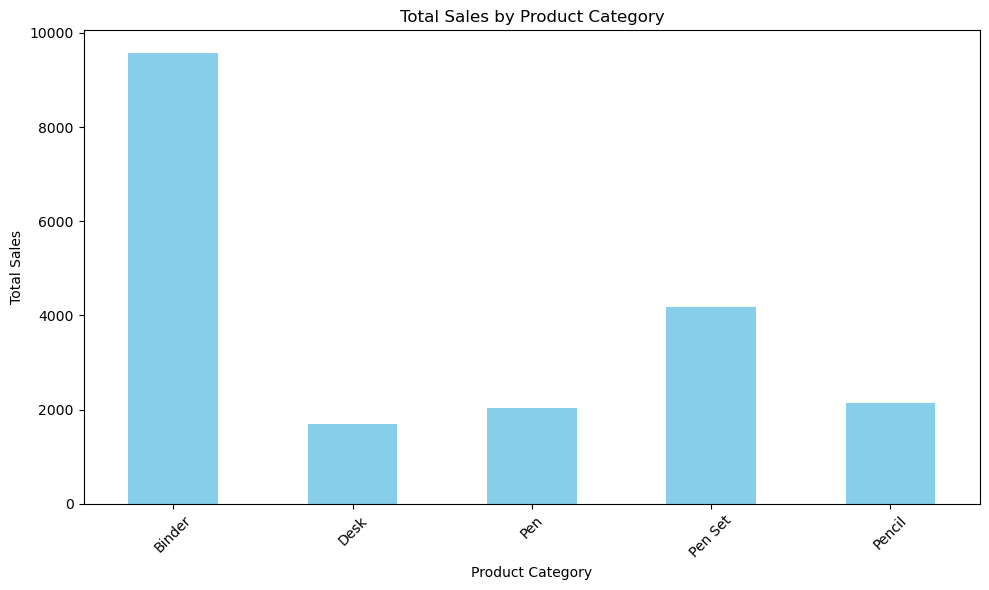

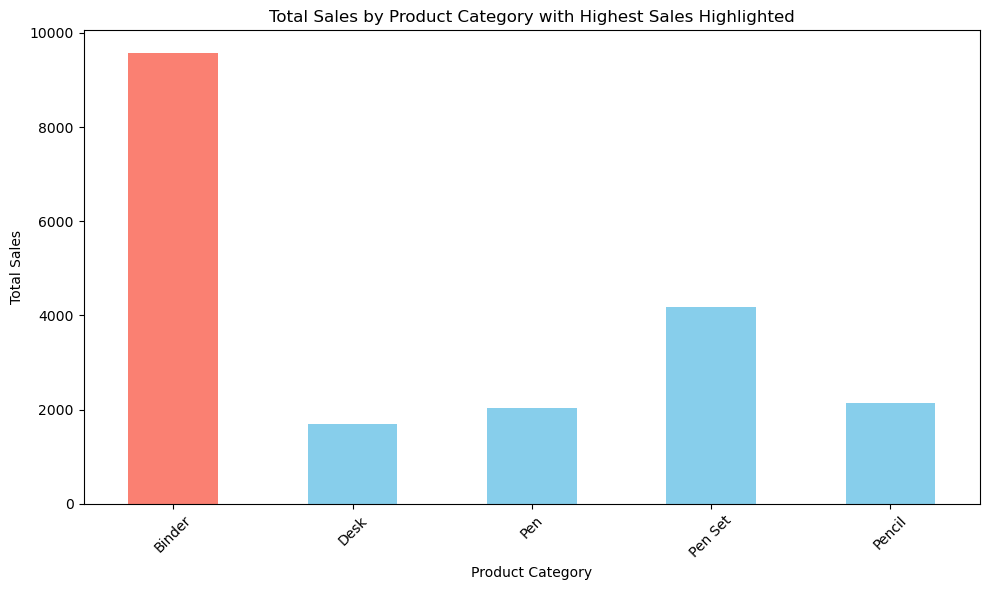

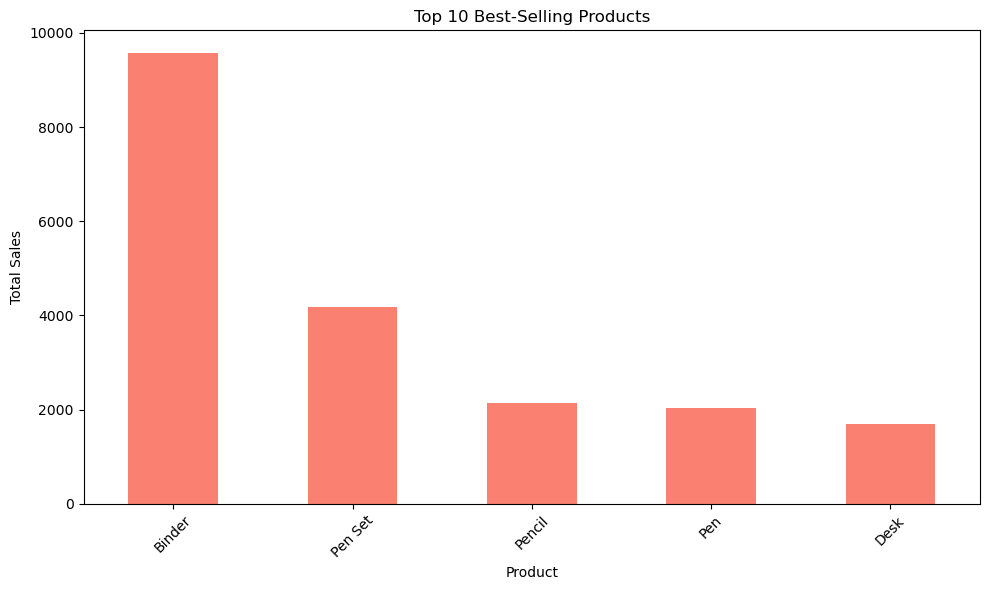

In [5]:
# Data Preprocessing
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['Units'] = pd.to_numeric(df['Units'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
# df.drop_duplicates(inplace=True)

# Calculate Sales
df['Sales'] = df['Units'] * df['Unit Price']

# Sales Analysis

# Total sales for each product category
total_sales_by_category = df.groupby('Item')['Sales'].sum()
print("Total Sales by Category:\n", total_sales_by_category)

# Product category with the highest sales
highest_sales_category = total_sales_by_category.idxmax()
highest_sales_value = total_sales_by_category.max()
print(f"\nHighest Sales Category: {highest_sales_category} with sales of {highest_sales_value}")

# Top 10 best-selling products
top_10_products = df.groupby('Item')['Sales'].sum().nlargest(10)
print("\nTop 10 Best-Selling Products:\n", top_10_products)

# Visualizations

# Total Sales by Category
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Highlighting the Product Category with the Highest Sales
plt.figure(figsize=(10, 6))
colors = ['salmon' if x == highest_sales_category else 'skyblue' for x in total_sales_by_category.index]
total_sales_by_category.plot(kind='bar', color=colors)
plt.title('Total Sales by Product Category with Highest Sales Highlighted')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Best-Selling Products
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Customers by Sales:
 Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Sales, dtype: float64
Total Number of Unique Customers: 11
Customer Purchase Frequency:
 Rep
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: count, dtype: int64


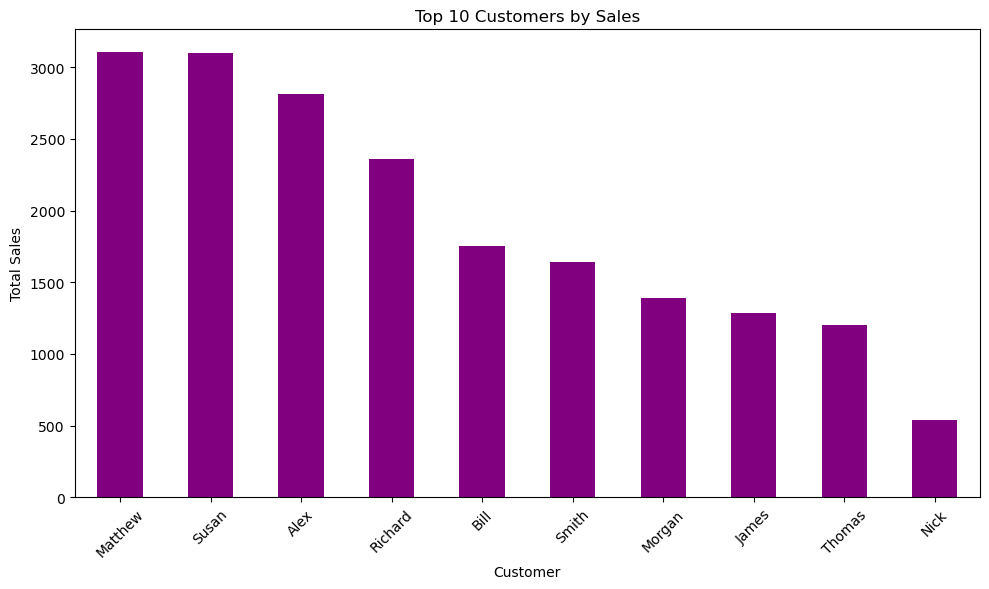

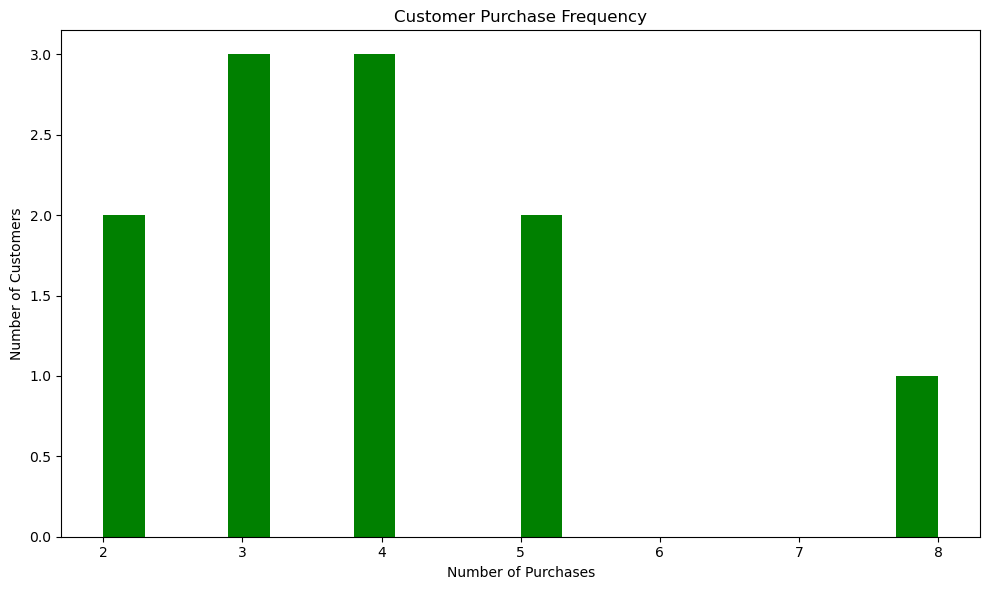

In [6]:
# Calculate Sales
df['Sales'] = df['Units'] * df['Unit Price']

# Customer Analysis

# Top 10 customers by sales
top_10_customers = df.groupby('Rep')['Sales'].sum().nlargest(10)
print("Top 10 Customers by Sales:\n", top_10_customers)

# Total number of unique customers
total_unique_customers = df['Rep'].nunique()
print(f"Total Number of Unique Customers: {total_unique_customers}")

# Customer purchase frequency
purchase_frequency = df['Rep'].value_counts()
print("Customer Purchase Frequency:\n", purchase_frequency)

# Visualizations

# Top 10 Customers by Sales
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Purchase Frequency
plt.figure(figsize=(10, 6))
purchase_frequency.plot(kind='hist', bins=20, color='green')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

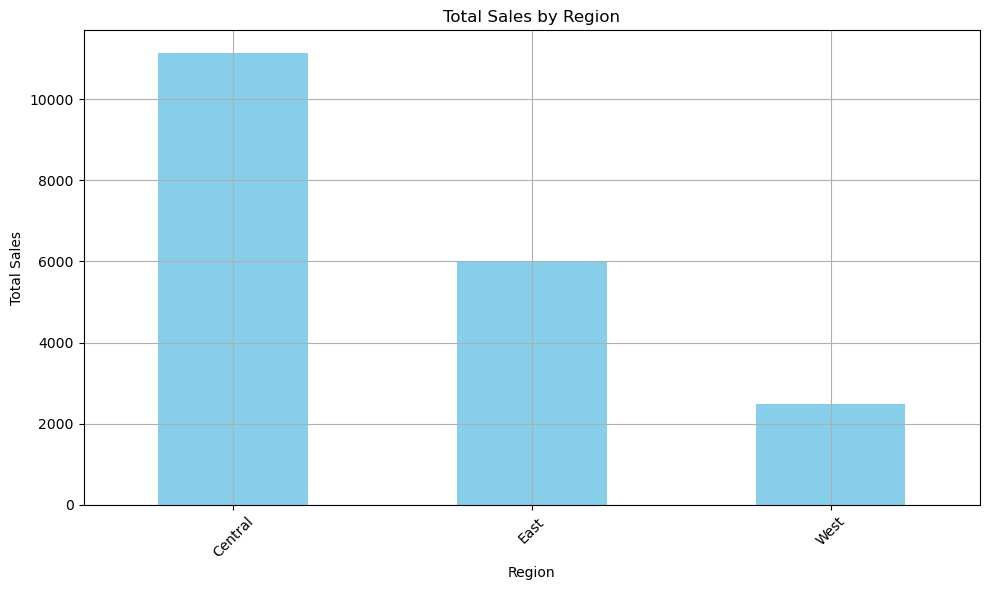

C:\Users\Asus\AppData\Local\Temp\ipykernel_15192\1681852598.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = region_data.groupby(pd.Grouper(key='OrderDate', freq='M'))['Sales'].sum()


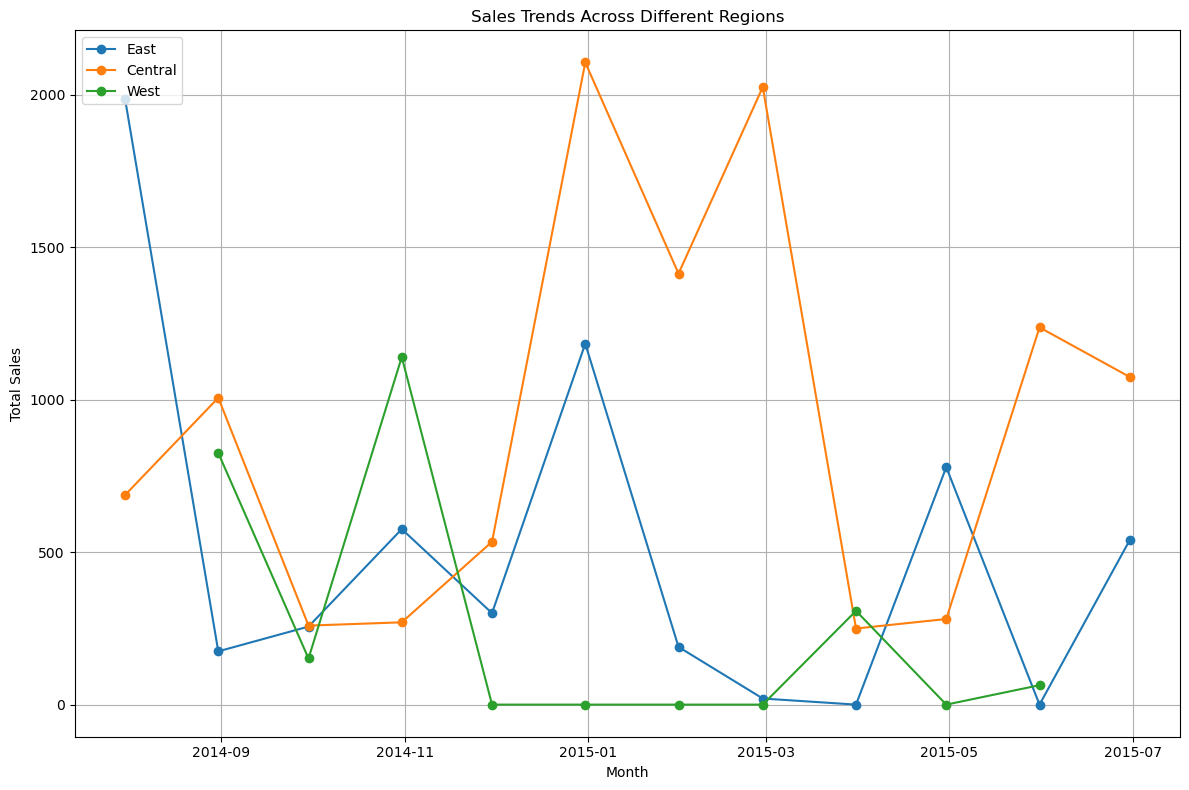

In [7]:
# Time Series Analysis
# Calculate Sales
df['Sales'] = df['Units'] * df['Unit Price']

# Calculate Total Sales by Region
total_sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Visualize Sales by Region
plt.figure(figsize=(10, 6))
total_sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Analyze Sales Trends Across Regions
plt.figure(figsize=(12, 8))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    sales_trend = region_data.groupby(pd.Grouper(key='OrderDate', freq='M'))['Sales'].sum()
    plt.plot(sales_trend.index, sales_trend.values, marker='o', label=region)

plt.title('Sales Trends Across Different Regions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

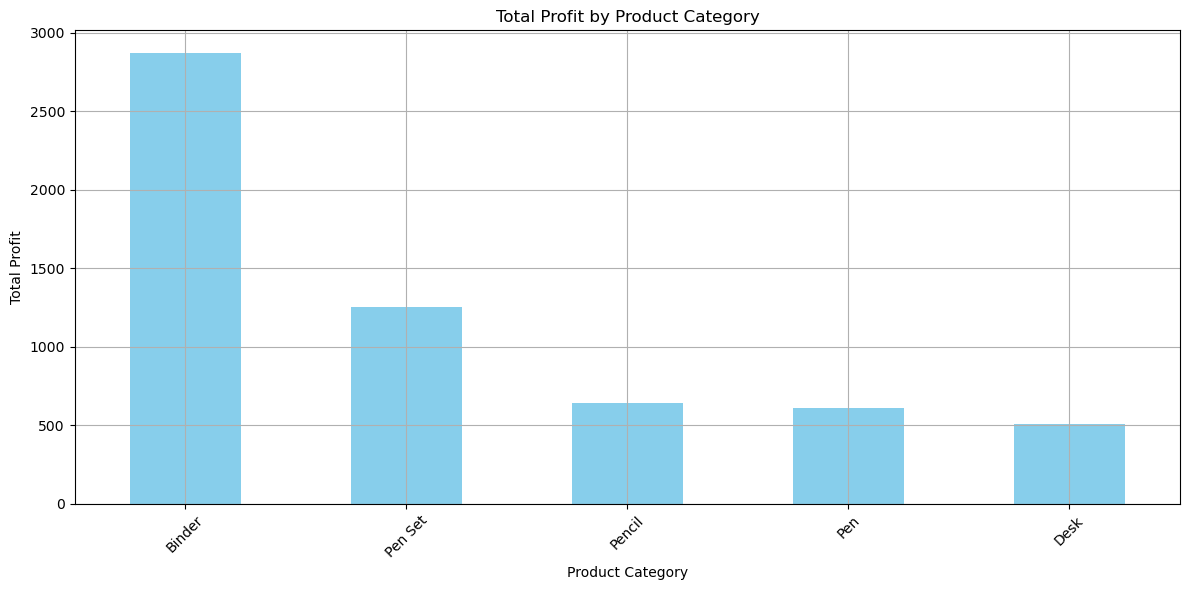

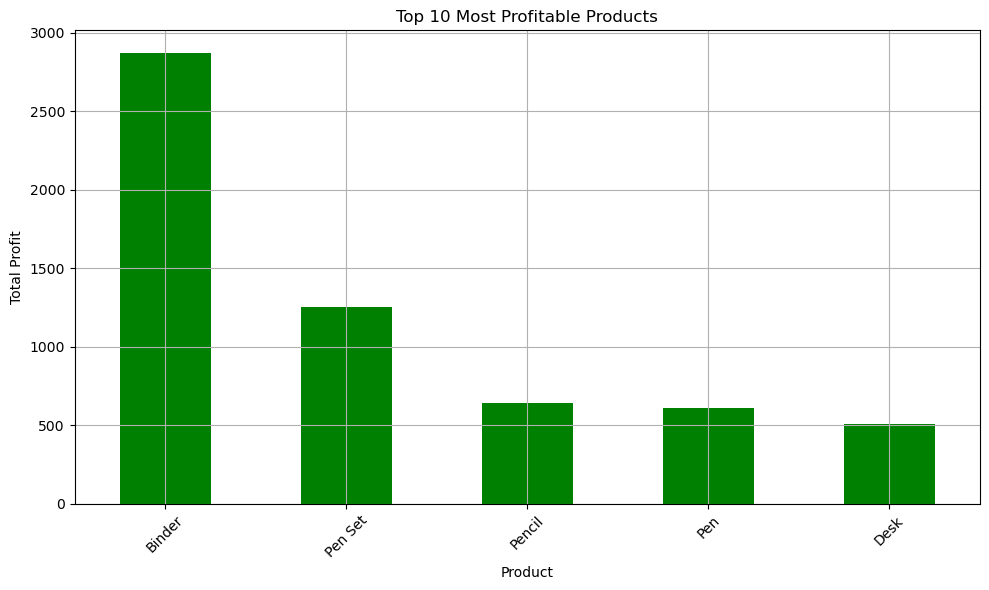

In [8]:
# Calculate Sales and Cost
df['Sales'] = df['Units'] * df['Unit Price']
df['Cost'] = df['Units'] * df['Unit Price'] * 0.7  # Assuming 70% of Unit Price as Cost (for example)

# Calculate Profit
df['Profit'] = df['Sales'] - df['Cost']

# Calculate Total Profit by Product Category
total_profit_by_category = df.groupby('Item')['Profit'].sum().sort_values(ascending=False)

# Identify Top 10 Most Profitable Products
top_10_profitable_products = total_profit_by_category.head(10)

# Visualize Total Profit by Product Category
plt.figure(figsize=(12, 6))
total_profit_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Visualize Top 10 Most Profitable Products
plt.figure(figsize=(10, 6))
top_10_profitable_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()